Deleting unwanted columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import json

In [ ]:
train_info_path = "dataset/avito-duplicate-ads-detection/ItemInfo_train.csv"
test_info_path = "dataset/avito-duplicate-ads-detection/ItemInfo_test.csv"
reader = pd.read_csv(train_info_path, encoding='utf-8')
reader.drop(['categoryID', 'title',
       'attrsJSON', 'price', 'locationID', 'metroID', 'lat', 'lon'], axis=1, inplace=True)
reader.to_csv("dataset/avito-duplicate-ads-detection/ItemInfo_train_processed.csv", encoding='utf-8')
test_info_path = "dataset/avito-duplicate-ads-detection/ItemInfo_test.csv"
reader = pd.read_csv(test_info_path, encoding='utf-8')
reader.drop(['categoryID', 'title',
       'attrsJSON', 'price', 'locationID', 'metroID', 'lat', 'lon'], axis=1, inplace=True)
reader.to_csv("dataset/avito-duplicate-ads-detection/ItemInfo_test_processed.csv", encoding='utf-8')

Data exploration

In [2]:
%%time
train_info_path = "dataset/avito-duplicate-ads-detection/ItemInfo_train_processed.csv"
reader = pd.read_csv(train_info_path, encoding='utf-8')

Wall time: 3min 19s


In [5]:
descriptions = reader['description']

In [6]:
for i, desc in enumerate(descriptions):
    print(desc)
    print("=====================")
    if i == 100:
        break

Продам Камаз 6520 20 тонн
Весь в тюнинге.
Телефон в хорошем состоянии, трещин и сколов нет, за все время менялся только аккумулятор(поэтому заряд держит хорошо), остальное все родное, в целом работает отлично! В комплекте кабель. Обмен не интересен. Лежит без дела, только продажа.
Отличный подарок на новый год от "китайской apple"
Новый в упаковке. Коробку вместе вскроем)
Экран: 5 дюймов, 1080p, Sharp/JDI OGS (Возможно использование в перчатках)
Цвет корпуса: белый
Материалы корпуса: пластик, металл, стекло

Процессор: Qualcomm Snapdragon 801 (8X74AC, 2.5Ггц)
Видео: Adreno 330 (578 Мгц)
ОЗУ: 3Гб (LPDDR3 933Мгц)
Память: 16Гб (eMMC 5.0)

Камера задняя: 13Мп (Sony IMX214, f1.8, 6 линз)
Камера передняя: 8Мп (Sony IMX219, f1.8, 5 линз)

WiFi: 802.11 a/b/g/n/ac 2.4/5Ггц
Bluetooth: 4.0
Навигация: GPS/Glonass
Сенсоры: ИК-Порт, Датчик освещенности, Барометр, Компас, Датчик силы тяжести

Симкарта: MicroSIM

Аккумулятор: 3080 мАч (быстрая зарядка при 9V/1.2A или 5V/2A)

Дополнительно: Поддержка S

Магнитафон новый покупался недавно за 29990 сейчас по акции стоит  около25 т продаю срочно за 15т без торга  не понимающих прошу не беспокоить ....Срочно Срочно
Продам 3-к квартиру в 20-ти этажном 2-х секционный жилом дом со встроенными нежилыми помещениями, по адресу ул. Профессора Камая д.12., на 12/20 этажного кирпичного дома, площадью 84,5/49,9/13,5. Окна и балконные двери из ПВХ профиля с однокамерным энергосберегающим стеклопакетом. Ограждение лоджий - витражное с одинарным заполнением стеклом, переплеты из алюминиевого профиля. Инженерные сети, в т.ч. теплоснабжение, холодное водоснабжение, электроснабжение - централизованное; горячее водоснабжение - от теплового узла жилого комплекса. Качественная предчистовая отделка. Удачна планировка.
Все новые с вкладышами. Почтой отправляю! Есть еще много единичек и полных серий. Вотсап и вибер
Продам ваз 21103 в отличном состоянии. Двс 1.6 16кл. 4стеклоподьемника 2 подогрева сидений.сигнализация. Резина зима лето. Небольшой торг. СРОЧНО!!

Delete rows where there is no description or image array

In [13]:
rows_with_nan_img_array = reader.index[reader['images_array'].isna() == True].tolist()
print("Ads without images: " + str(len(rows_with_nan_img_array)))

rows_with_nan_desc = reader.index[reader['description'].isna() == True].tolist()
print("Ads without description: " + str(len(rows_with_nan_desc)))

rows_with_nan = list(set(rows_with_nan_img_array) | set(rows_with_nan_desc)) 
print("Total ads to be deleted: " + str(len(rows_with_nan)))

Ads without images: 398025
Ads without description: 105
Total ads to be deleted: 398128


In [14]:
reader.drop(index=rows_with_nan, inplace=True)
reader.to_csv("dataset/avito-duplicate-ads-detection/ItemInfo_train_processed.csv", encoding='utf-8')

Repeating same procedure for test set

In [15]:
%%time
test_info_path = "dataset/avito-duplicate-ads-detection/ItemInfo_test_processed.csv"
reader = pd.read_csv(test_info_path, encoding='utf-8')

Wall time: 56.7 s


In [16]:
rows_with_nan_img_array = reader.index[reader['images_array'].isna() == True].tolist()
print("Ads without images: " + str(len(rows_with_nan_img_array)))

rows_with_nan_desc = reader.index[reader['description'].isna() == True].tolist()
print("Ads without description: " + str(len(rows_with_nan_desc)))

rows_with_nan = list(set(rows_with_nan_img_array) | set(rows_with_nan_desc)) 
print("Total ads to be deleted: " + str(len(rows_with_nan)))

Ads without images: 181980
Ads without description: 44
Total ads to be deleted: 182023


In [17]:
reader.drop(index=rows_with_nan, inplace=True)
reader.to_csv("dataset/avito-duplicate-ads-detection/ItemInfo_test_processed.csv", encoding='utf-8')

Sentence length frequency

In [34]:
train_info_path = "dataset/ItemInfo_train_processed.csv"
reader = pd.read_csv(train_info_path, encoding='utf-8')
descriptions = reader['description']

In [35]:
descriptions[165964]

'Размеры сеток тканных : 0.04х0.04х0.03, 0.4х0.4х0.25, 0.4х0.4х0.5, 0.45х0.45х0.2, 0.5х0.5х0.25, 0.5х0.5х0.3, 0.56х0.56х0.25, 0.63х0.63х0.25, 0.63х0.63х0.3, 0.63х0.63х0.32, 0.7х0.7х0.28, 0.7х0.7х0.3, 0.7х0.7х0.32, 0.8х0.8х0.25, 0.8х0.8х0.3, 0.8х0.8х0.32, 0.8х0.8х0.45, 0.9х0.9х0.22, 0.9х0.9х0.36, 0.9х0.9х0.4, 1х1х0.25, 1х1х0.32, 1х1х0.4, 1х1х0.45, 1.1х1.1х0.28, 1.1х1.1х0.36, 1.2х1.2х0.32, 1.2х1.2х0.4, 1.25х1.25х0.4, 1.4х1.4х0.36, 1.4х1.4х0.45, 1.4х1.4х0.65, 1.6х1.6х0.32, 1.6х1.6х0.4, 1.6х1.6х0.5, 1.8х1.8х0.45, 1.8х1.8х0.55, 1.8х1.8х0.7, 2х2х0.4, 2х2х0.5, 2х2х0.6, 2х2х0.9, 2х2х1, 2х2х1.2, 2.2х2.2х0.7, 2.5х2.5х0.45, 2.5х2.5х0.5, 2.5х2.5х0.6, 2.5х2.5х0.7, 2.8х2.8х0.45, 2.8х2.8х0.9, 3х3х0.5, 3х3х1, 3х3х1.2, 3.2х3.2х0.5, 3.2х3.2х0.8, 3.2х3.2х1.2, 3.5х3.5х0.7, 3.5х3.5х0.9, 3.5х3.5х1, 4х4х0.6, 4х4х1, 4х4х1, 4х4х1.2, 4х4х1.6, 4.5х4.5х0.7, 4.5х4.5х0.9, 5х5х0.7, 5х5х1, 5х5х1.2, 5х5х1.6, 5х5х2, 6.0х6.0х1.2, 6.0х6.0х2, 6х6х2.2, 7х7х1, 7х7х1.2, 8х8х0.7, 8х8х1.2, 8х8х1.6, 8х8х1.8, 8х8х2, 8х8х3, 10х10

In [12]:
lengths = {}
for desc in descriptions:    

    length = len(str(desc))
    if length in lengths.keys():
        lengths[length] = lengths[length] + 1
    else:
        lengths[length] = 1

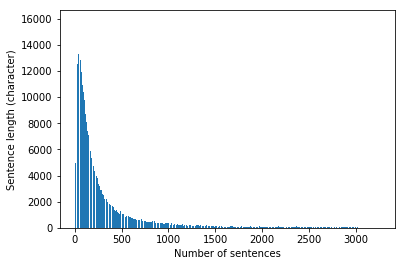

In [13]:
plt.bar(list(lengths.keys()), list(lengths.values()))
plt.xlabel('Number of sentences')
plt.ylabel("Sentence length (character)")
plt.show()
#savefig("Number_of_characters_distribution.pdf", bbox_inches='tight')

In [14]:
lengths = {}
for desc in descriptions:    
    length = len(str(desc).split())
    if length in lengths.keys():
        lengths[length] = lengths[length] + 1
    else:
        lengths[length] = 1

In [41]:
# Sanity check
print("Are there 0 length sentences?: " + str(0 in lengths.keys()))

Are there 0 length sentences?: False


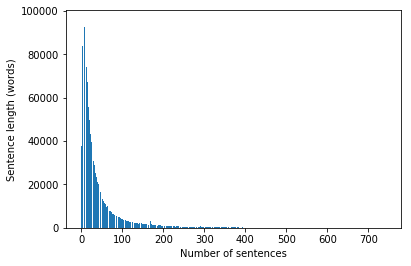

In [17]:
plt.bar(list(lengths.keys()), list(lengths.values()))
plt.xlabel('Number of sentences')
plt.ylabel('Sentence length (words)')
plt.show()
#savefig("Number_of_words_distribution.pdf", bbox_inches='tight')

In [42]:
# Sanity check
print("Are there 0 length sentences?: " + str(0 in lengths.keys()))

Are there 0 length sentences?: False


In [2]:
file_path = '/run/media/s1885778/KINGSTON/processed_no_lemma.csv'
reader = pd.read_csv(file_path, encoding='utf-8')
descriptions = reader['descriptions']

In [3]:
lengths = {}
for i, line in enumerate(descriptions):   
    length = len(str(line).split())
    
    if length == 0:
        print(i)
        
    if length in lengths.keys():
        lengths[length] = lengths[length] + 1
    else:
        lengths[length] = 1

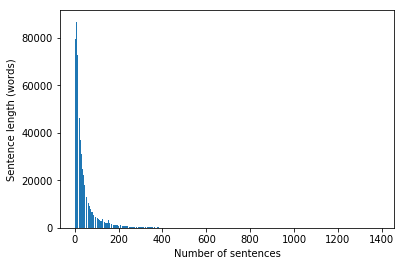

In [38]:
plt.bar(list(lengths.keys()), list(lengths.values()))
plt.xlabel('Number of sentences')
plt.ylabel('Sentence length (words)')
plt.show()
#savefig("Number_of_words_distribution.pdf", bbox_inches='tight')

In [4]:
print("Are there 0 length sentences?: " + str(0 in lengths.keys()))
print("Maximum length of a sentence is: " + str(np.max(list(lengths.keys()))))

Are there 0 length sentences?: False
Maximum length of a sentence is: 1388


Finding what will be the fixed length of the sentences

In [42]:
import operator
sorted_length = dict(sorted(lengths.items(), key=operator.itemgetter(0), reverse=False))

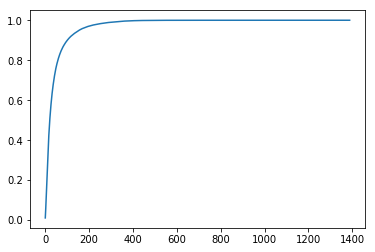

In [47]:
y = np.array(list(sorted_length.values()))
y = np.cumsum(y)
last = y[-1]
y = y / last
x = list(sorted_length.keys())
plt.plot(x, y)
plt.show()

In [49]:
value = 0.90
idx = (np.abs(y - value)).argmin()
print(y[idx])
print(x[idx])

0.8995978562747902
101


In [9]:
for i, line in enumerate(descriptions):   
    length = len(str(line).split())
    
    if length == 1388:
        print(i)
        print(line)
        print("=====")
       
        

165873
размеры сеток тканных 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 х 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 х 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 х 0 х 0 0 0 х 0 х 0 0 х 0 х 0 0 х 0 х 0 0 0 х 0 х 0 0 0 0 х 0 0 х 0

2569559
размеры сеток тканных 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 х 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 х 0 х 0 0 0 х 0 х 0 0 х 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 0 0 х 0 0 х 0 0 х 0 х 0 0 0 х 0 х 0 0 х 0 х 0 0 х 0 х 0 0 0 х 0 х 0 0 0 0 х 0 0 х 

Remove Nan from processed descriptions

In [4]:
train_info_path = "dataset/ItemInfo_train_processed.csv"
images = pd.read_csv(train_info_path, encoding='utf-8')['images_array']

In [5]:
file_paths = ['/run/media/s1885778/KINGSTON/processed_with_lemma.csv', '/run/media/s1885778/KINGSTON/processed_no_lemma.csv']
image_paths = ["/run/media/s1885778/KINGSTON/processed_with_lemma_images.csv", "/run/media/s1885778/KINGSTON/processed_no_lemma_images.csv"]
for i, file_path in enumerate(file_paths):
    reader = pd.read_csv(file_path, encoding='utf-8')
    rows_with_nan_desc = reader.index[reader['descriptions'].isna() == True].tolist()
    print(len(rows_with_nan_desc))
    reader.drop(index=rows_with_nan_desc, inplace=True)
    reader.to_csv(file_path, encoding='utf-8')
    im_drop = images.drop(index=rows_with_nan_desc)
    im_drop.to_csv(image_paths[i], encoding='utf-8')

1518
1518


In [2]:
reader = pd.read_csv("/run/media/s1885778/KINGSTON/processed_rus_vectores.csv", encoding='utf-8')
rows_with_nan_desc = reader.index[reader['descriptions'].isna() == True].tolist()
print(len(rows_with_nan_desc))

8


In [ ]:
reader.drop(index=rows_with_nan_desc, inplace=True)

In [ ]:
reader.to_csv("/run/media/s1885778/KINGSTON/processed_rus_vectores.csv", encoding='utf-8')

In [10]:
images = pd.read_csv("/run/media/s1885778/KINGSTON/processed_no_lemma_images.csv", encoding='utf-8')

In [11]:
im_drop = images.drop(index=rows_with_nan_desc)
im_drop.to_csv("/run/media/s1885778/KINGSTON/processed_no_lemma_images.csv", encoding='utf-8')

In [12]:
rows_with_nan_desc

[49520, 812684, 991347, 1264341, 1336730, 1406443, 1954954, 2414356]

Word frequencis

In [68]:
data = json.load(open("/run/media/s1885778/KINGSTON/word_freq_fasttext.json"))

In [71]:
print('Lemmatized dataset. Vocabulary size: ' + str(len(data)))

Lemmatized dataset. Vocabulary size: 1055116


In [73]:
np.array(data)[0:100000]

array([['0', '13928845'],
       ['в', '3445929'],
       ['и', '2838787'],
       ...,
       ['стальна', '12'],
       ['уместенписать', '12'],
       ['свитерапальто', '12']], dtype='<U282')

In [3]:
import os
from glob import glob

In [7]:
%%timeit
for x in os.walk('C:\\The University of Edinburgh - Msc Artifical Intelligence\\Neural Record Linkage\\nrl\\dataset\\avito-duplicate-ads-detection\\Images\\Images_8'):
    for y in glob(os.path.join(x[0], "*.jpg")):
        i = 1

49 s ± 2.28 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [1]:
import pandas as pd
train_info_path = "dataset/avito-duplicate-ads-detection/ItemPairs_train.csv"
reader = pd.read_csv(train_info_path, encoding='utf-8')

In [28]:
len(reader[reader.isDuplicate == 1])

1264279

In [58]:
reader.iloc[[2, 6, 7]]

,itemID_1,itemID_2,isDuplicate,generationMethod
2,4,1223296,0,1
6,12,5637025,0,1
7,12,5279740,0,1


In [30]:
set(reader[0:10].itemID_1)

{1, 3, 4, 7, 8, 9, 12, 15, 16}

In [31]:
dataframe_ids = (set(reader.itemID_1) | set(reader.itemID_2))

In [32]:
import h5py
ids = h5py.File('dataset/avito-duplicate-ads-detection/processed_files/fasttext_desc.hdf5', 'r')['itemID'][:]
v = set(ids.tolist())

In [33]:
len(dataframe_ids)

3344613

In [34]:
len(v)

2944967

In [35]:
diff = dataframe_ids - v

In [39]:
diff = list(diff)

In [44]:
len(reader.index[reader.itemID_1.isin(diff)])

279191

In [45]:
len(reader.index[reader.itemID_2.isin(diff)])

279953

In [46]:
7 in v

False

In [11]:
v = reader[reader.isDuplicate == 1].index.values

In [12]:
import numpy as np

In [20]:
k = np.random.choice(v, 10)
k

array([1378328,  779675, 1246727,  855723, 2840373, 2384960,  713381,
       2750845,  723175, 2339237], dtype=int64)

In [25]:
reader[-10:]

,itemID_1,itemID_2,isDuplicate,generationMethod
2991386,6099075,6108403,0,1
2991387,6100664,6101171,0,1
2991388,6101234,6105511,0,1
2991389,6101382,6109873,0,1
2991390,6101511,6105056,0,3
2991391,6104033,6110827,0,1
2991392,6104879,6111227,1,1
2991393,6105178,6106210,0,1
2991394,6106239,6109219,1,2
2991395,6106742,6108600,0,3


In [28]:
reader.drop(index=[2991387], inplace=True)

In [35]:
k = np.concatenate((k, [2991387]))

In [40]:
reader.loc[k]

c:\users\marko\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,itemID_1,itemID_2,isDuplicate,generationMethod
1378328,1609797.0,1845001.0,1.0,1.0
779675,849612.0,1946582.0,1.0,1.0
1246727,1432026.0,3240969.0,1.0,1.0
855723,940144.0,2881515.0,1.0,2.0
2840373,4731132.0,5566305.0,1.0,1.0
2384960,3347781.0,4543044.0,1.0,1.0
713381,771014.0,1889175.0,1.0,1.0
2750845,4367920.0,5438564.0,1.0,1.0
723175,782334.0,2264048.0,1.0,1.0
2339237,3243343.0,5355734.0,1.0,1.0
